# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
          
# Print the city count to confirm sufficient count
print(len(cities))
 


615


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.

cities_df=[]
appendlist={}

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "IMPERIAL"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
for city in cities:
    city=('%20').join(city.split(' '))
    response = requests.get(query_url + city).json()
    print(f'{query_url}{city}')
    try:
        appendlist={"city Name":(response["name"])
                    ,"Temperature (F)":(response["main"]["temp"])
                    ,"Humidity (%)":(response["main"]["humidity"])
                    ,"Cloudiness (%)":(response["clouds"]["all"])
                    ,"Wind Speed (mph)":(response["wind"]["speed"])
                    ,"Latitude":(response["coord"]["lat"])
                    #convert timestamp to date
                    ,"Date":(pd.Timestamp((response["dt"]), unit='s').date())
                   }
        cities_df.append(appendlist)
    except:
        city=(' ').join(city.split('%20'))
        print(f'City name :{city}.....No City data found' )
        


http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=east%20london
City name :east london.....No City data found
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=sao%20filipe
City name :sao filipe.....No City data found
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=daru
City name :daru.....No City data found
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=albany
City name :albany.....No City data found
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=hovd
City name :hovd.....No City data found
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=butaritari
City name :butaritari.....No City data found
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585

City name :nikel.....No City data found
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=saleaula
City name :saleaula.....No City data found
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=sokoni
City name :sokoni.....No City data found
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=puerto%20carreno
City name :puerto carreno.....No City data found
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=dole
City name :dole.....No City data found
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=sisimiut
City name :sisimiut.....No City data found
http://api.openweathermap.org/data/2.5/weather?appid=45e5bdaff370b491585147a13eed5f53&units=IMPERIAL&q=hay%20river
City name :hay river.....No City data found
http://api.openweatherma

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Save the DataFrame as a csv
    
cities_df=pd.DataFrame(cities_df)
cities_df.to_csv("city_weather_data.csv", encoding="utf-8", index=False)




""


In [7]:
file = "city_weather_data.csv"
cities_df = pd.read_csv(file)
cities_df.head()

,city Name,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Date
0,Hermanus,82.99,51,47,4.00,-34.42,2020-03-02
1,Marsaxlokk,68.58,49,100,11.41,35.84,2020-03-02
2,Ushuaia,51.80,62,20,11.41,-54.80,2020-03-02
3,Tuktoyaktuk,-22.14,100,98,8.52,69.45,2020-03-02
4,Pran Buri,84.20,74,20,12.75,12.38,2020-03-02


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [19]:
Lat_temp_x = cities_df[["Latitude"]].values

Lat_temp_y=cities_df[["Temperature (F)"]].values

#Lat_temp_y,Lat_temp_x

#### Latitude vs. Humidity Plot

In [21]:
Lat_humidity_x =cities_df[["Latitude"]].values
Lat_humidity_y =cities_df[["Humidity (%)"]].values

#### Latitude vs. Cloudiness Plot

In [24]:
Lat_cloud_x =cities_df[["Latitude"]].values
Lat_cloud_y =cities_df[["Cloudiness (%)"]].values


#### Latitude vs. Wind Speed Plot

In [ ]:
Lat_wind_x =cities_df[["Latitude"]].values
Lat_wind_y =cities_df[["Wind Speed (mph)"]].values

## Linear Regression

In [44]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regres(x,y):
    x_values=x
    y_values=y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel('Latitude')


In [53]:
# Create Northern and Southern Hemisphere DataFrames

Sourthern_df =cities_df.loc[cities_df["Latitude"]<0,:]

Northern_df =cities_df.loc[cities_df["Latitude"]>=0,:]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

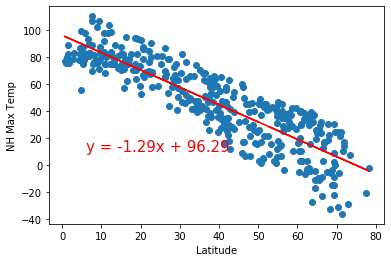

In [57]:
NH_Max_temps=Northern_df[["city Name","Temperature (F)","Latitude"]].groupby("city Name").max()
x_values=NH_Max_temps["Latitude"].values
y_values=NH_Max_temps["Temperature (F)"].values
linear_regres(x_values,y_values)
plt.ylabel('NH Max Temp')
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

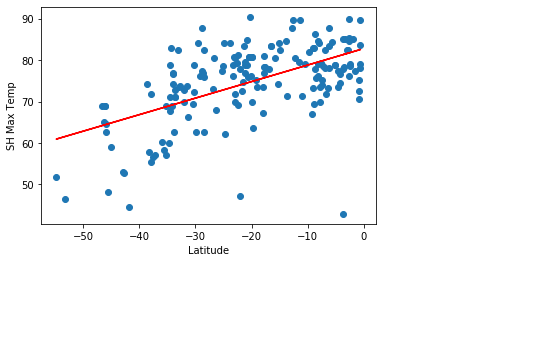

In [58]:
SH_Max_temps=Sourthern_df[["city Name","Temperature (F)","Latitude"]].groupby("city Name").max()
x_values=SH_Max_temps["Latitude"].values
y_values=SH_Max_temps["Temperature (F)"].values
linear_regres(x_values,y_values)
plt.ylabel('SH Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

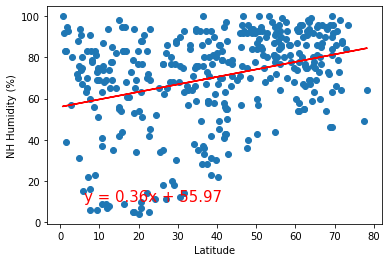

In [56]:
x_values=Northern_df["Latitude"].values
y_values=Northern_df["Humidity (%)"].values
linear_regres(x_values,y_values)
plt.ylabel('NH Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

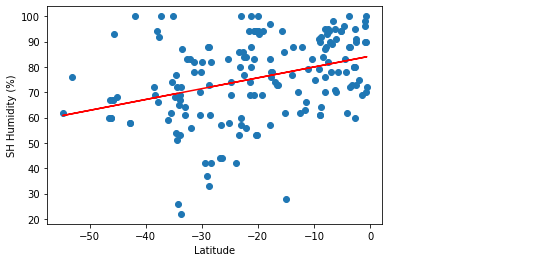

In [59]:
x_values=Sourthern_df["Latitude"].values
y_values=Sourthern_df["Humidity (%)"].values
linear_regres(x_values,y_values)
plt.ylabel('SH Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

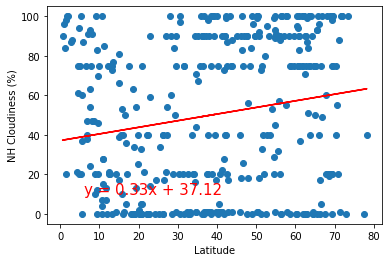

In [61]:
x_values=Northern_df["Latitude"].values
y_values=Northern_df["Cloudiness (%)"].values
linear_regres(x_values,y_values)
plt.ylabel('NH Cloudiness (%)')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

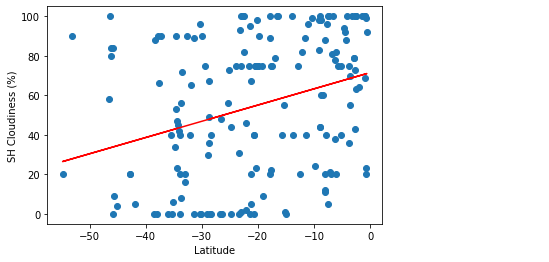

In [65]:
x_values=Sourthern_df["Latitude"].values
y_values=Sourthern_df["Cloudiness (%)"].values
linear_regres(x_values,y_values)
plt.ylabel('SH Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

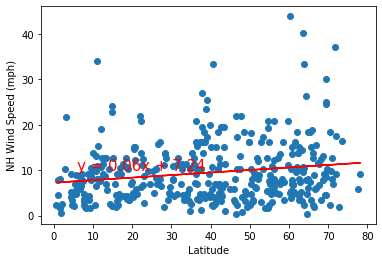

In [67]:
x_values=Northern_df["Latitude"].values
y_values=Northern_df["Wind Speed (mph)"].values
linear_regres(x_values,y_values)
plt.ylabel('NH Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

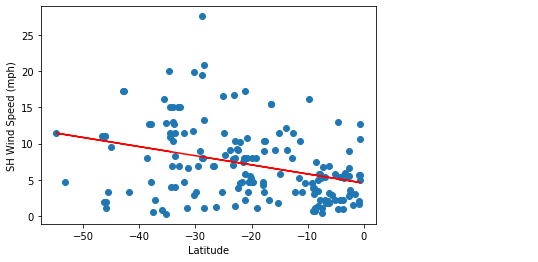

In [68]:
x_values=Sourthern_df["Latitude"].values
y_values=Sourthern_df["Wind Speed (mph)"].values
linear_regres(x_values,y_values)
plt.ylabel('SH Wind Speed (mph)')
plt.show()